##Importações básicas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import decomposition
from sklearn import datasets
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

## Visualizar Dataset Iris

In [2]:
data = datasets.load_iris()
X = pd.DataFrame(data.data, columns = data.feature_names)
y = data.target

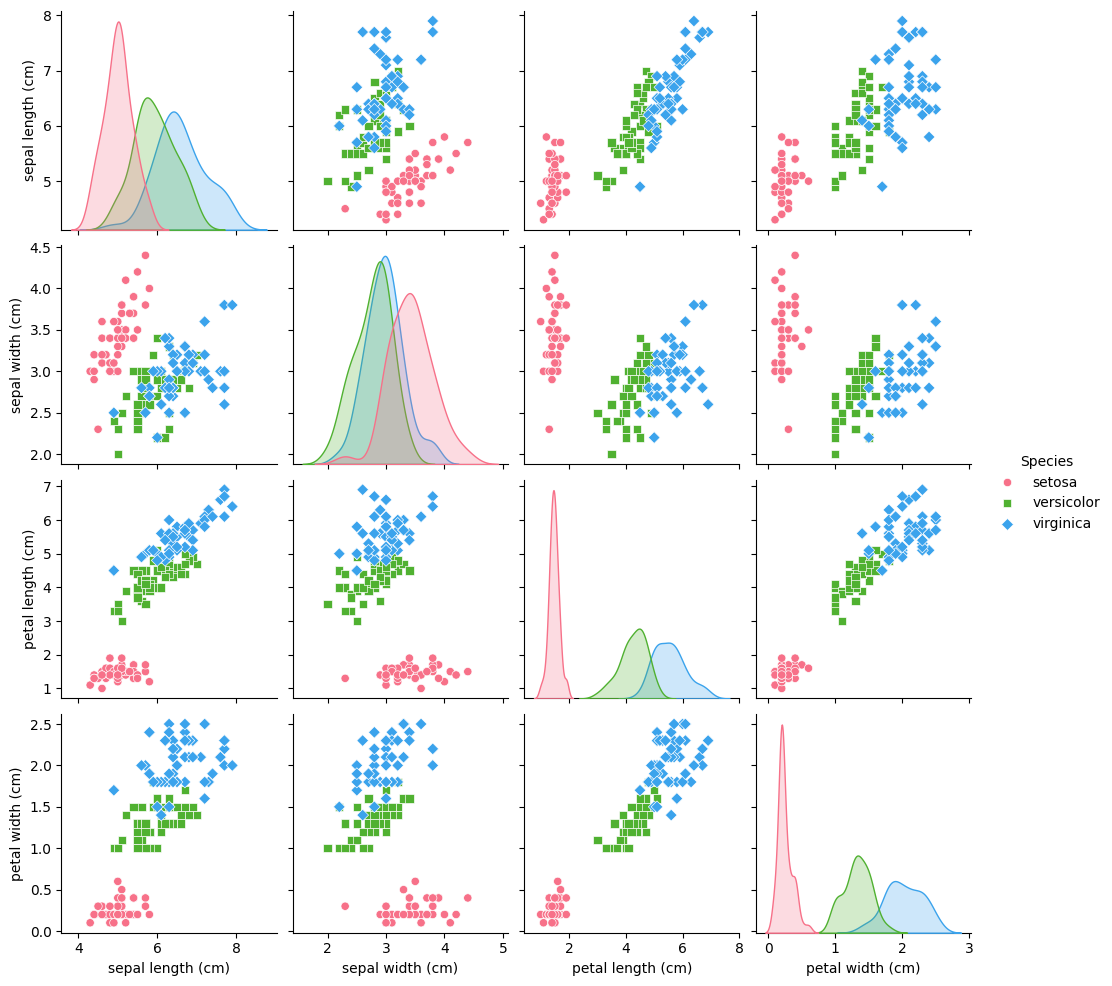

In [3]:
iris = X.copy()
iris['Species'] = data.target_names[y]
sns.pairplot(iris, hue="Species", palette="husl", markers=["o", "s", "D"])

#Redução Dimensional

Árvore de decisão sem limite de profundidade

In [4]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3,
                                                    stratify=y,
                                                    random_state=42)

clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)
preds = clf.predict_proba(X_test)
print('Accuracy: {:.5f}'.format(accuracy_score(y_test,
                                                preds.argmax(axis=1))))

Accuracy: 0.93333


Aplicando árvore de decisão com duas camadas de profundidade

In [5]:
clf = DecisionTreeClassifier(max_depth=2, random_state=42)
clf.fit(X_train, y_train)
preds = clf.predict_proba(X_test)
print('Accuracy: {:.5f}'.format(accuracy_score(y_test,
                                                preds.argmax(axis=1))))

Accuracy: 0.88889


## PCA

Realizando a redução dimensional de 4 atributos para 2 atributos utilizando PCA e aplicando árvore de decisão

In [6]:
pca = decomposition.PCA(n_components=2)
pca.fit(X)
X_pca = pca.transform(X)


X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=.3,
                                                    stratify=y,
                                                    random_state=42)

clf = DecisionTreeClassifier(max_depth=2, random_state=42)
clf.fit(X_train, y_train)
preds = clf.predict_proba(X_test)
print('Accuracy: {:.5f}'.format(accuracy_score(y_test,
                                                preds.argmax(axis=1))))

Accuracy: 0.91111


Como podemos observar, ao aplicar PCA nos dados obtivemos um resultado melhor do que sem o tratamento para a mesma profundidade, partindo de uma acurácia de 88% para 91%. Entretanto, é possível observar que se utilizarmos os dados originais nesse problema somos capazes de obter um resultado melhor, porém necessitando de maior gasto computacional por termos uma árvore mais profunda.

## LDA

Realizando a redução dimensional de 4 atributos para 2 atributos utilizando LDA e aplicando árvore de decisão

In [7]:
lda = LinearDiscriminantAnalysis(n_components=2)
lda.fit(X, y)
X_lda = lda.transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_lda, y, test_size=.3,
                                                    stratify=y,
                                                    random_state=42)

clf = DecisionTreeClassifier(max_depth=2, random_state=42)
clf.fit(X_train, y_train)
preds = clf.predict_proba(X_test)
print('Accuracy: {:.5f}'.format(accuracy_score(y_test,
                                                preds.argmax(axis=1))))

Accuracy: 0.95556


##Gráficos

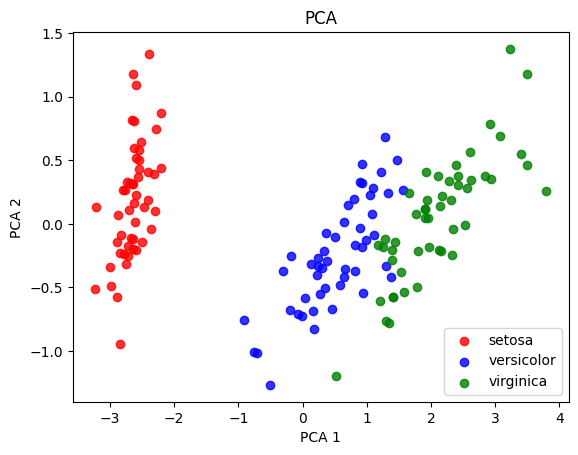

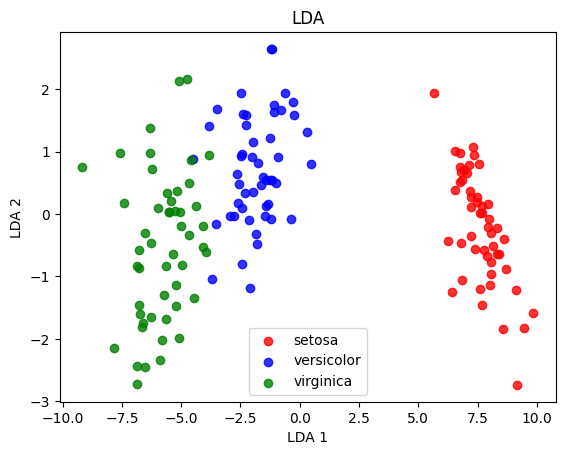

In [8]:
target_names = ['setosa', 'versicolor', 'virginica']

dim_reduction_methods = [("PCA", pca), ("LDA", lda)]
colors = ['red', 'blue', 'green']

for i, (name, model) in enumerate(dim_reduction_methods):
    plt.figure()
    model.fit(X, y)
    X_embedded = model.transform(X)
    for color, target_name in zip(colors, target_names):
        plt.scatter(X_embedded[y == target_names.index(target_name), 0],
                    X_embedded[y == target_names.index(target_name), 1],
                    alpha=0.8,
                    color=color,
                    label=target_name)
    plt.title(name)
    plt.xlabel(f"{name} 1")
    plt.ylabel(f"{name} 2")
    plt.legend(loc='best')
    plt.show()

#Agrupamentos

## K-means
(não confundir com KNN)

In [9]:
from sklearn.cluster import KMeans

In [10]:
kmeans = KMeans(n_clusters=3,init = 'k-means++',   max_iter = 100, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(X)
print(kmeans.cluster_centers_)

[[5.9016129  2.7483871  4.39354839 1.43387097]
 [5.006      3.428      1.462      0.246     ]
 [6.85       3.07368421 5.74210526 2.07105263]]


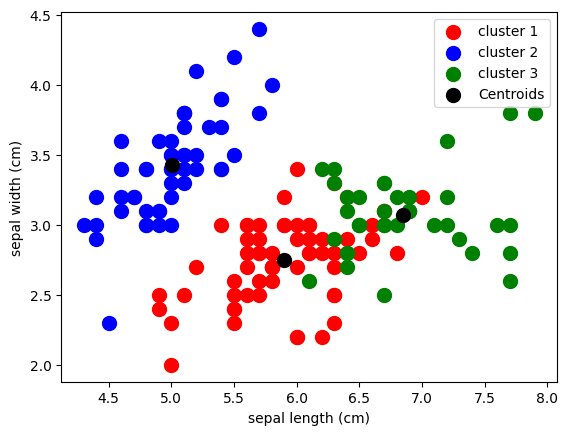

In [11]:
cluster_1 = X.loc[y_kmeans == 0]
cluster_2 = X.loc[y_kmeans == 1]
cluster_3 = X.loc[y_kmeans == 2]
plt.scatter(cluster_1[X.columns[0]], cluster_1[X.columns[1]],s = 100, c = 'red', label = 'cluster 1')
plt.scatter(cluster_2[X.columns[0]], cluster_2[X.columns[1]],s = 100, c = 'blue', label = 'cluster 2')
plt.scatter(cluster_3[X.columns[0]],cluster_3[X.columns[1]],s = 100, c = 'green', label = 'cluster 3')
plt.scatter(kmeans.cluster_centers_[:,   0], kmeans.cluster_centers_[:,1],s = 100, c = 'black', label = 'Centroids')
plt.xlabel(f"{data.feature_names[0]}")
plt.ylabel(f"{data.feature_names[1]}")
plt.legend()
plt.show()

## K-prototypes

In [12]:
!pip install kmodes
from kmodes.kprototypes import KPrototypes

Inclusão de um atributo categorico ao dataset, visando a exemplificação do k-prototypes.

In [13]:
bins = [0, 2.5, 5, 10]  # Definindo os intervalos
labels = ['Curto', 'Médio', 'Longo']

X_kp = X.copy()

# Criar a coluna categórica baseada no comprimento das pétalas
X_kp['categoria_comprimento_pétala'] = pd.cut(X_kp['petal length (cm)'], bins=bins, labels=labels, include_lowest=True)

In [14]:
# Converter a coluna categórica para códigos numéricos
X_kp['categoria_comprimento_pétala'] = X_kp['categoria_comprimento_pétala'].cat.codes

categorical_columns = [4]

# Aplicar K-Prototypes
kproto = KPrototypes(n_clusters=3, init='Huang', random_state=42)
clusters = kproto.fit_predict(X_kp, categorical=categorical_columns)

# Adicionar os rótulos dos clusters ao DataFrame original
X_kp['cluster'] = clusters

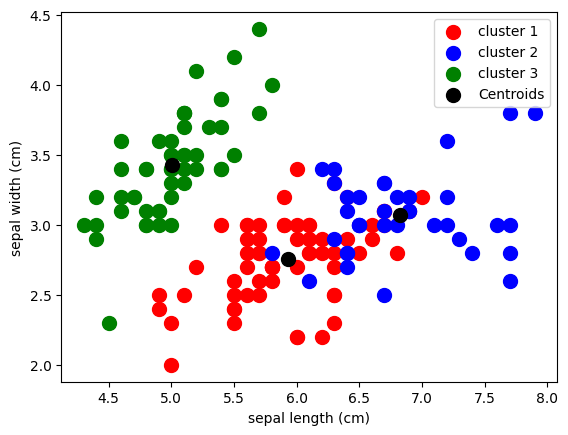

In [15]:
cluster_1 = X_kp.loc[X_kp['cluster'] == 0]
cluster_2 = X_kp.loc[X_kp['cluster'] == 1]
cluster_3 = X_kp.loc[X_kp['cluster'] == 2]

plt.scatter(cluster_1[X_kp.columns[0]], cluster_1[X_kp.columns[1]],s = 100, c = 'red', label = 'cluster 1')
plt.scatter(cluster_2[X_kp.columns[0]], cluster_2[X_kp.columns[1]],s = 100, c = 'blue', label = 'cluster 2')
plt.scatter(cluster_3[X_kp.columns[0]],cluster_3[X_kp.columns[1]],s = 100, c = 'green', label = 'cluster 3')

centers = kproto.cluster_centroids_
centers_num = centers[:, :4].astype(float)
plt.scatter(centers_num[:, 0], centers_num[:, 1], s=100, c='black', label='Centroids')


plt.xlabel(f"{data.feature_names[0]}")
plt.ylabel(f"{data.feature_names[1]}")


plt.legend()
plt.show()

# Tarefa

Para testar suas habilidades, aplique os conhecimentos discutidos no conjunto de dados disponibilizado a seguir.

Além disso, pesquise sobre como escolher o número apropriado de clusters para melhor solucionar o problema proposto. Duas técnicas comumente utilizadas para isso são o **elbow method** e o **silhouette coefficient**. Aplique elas e explique sua escolha.

Material de apoio:


*  https://realpython.com/k-means-clustering-python/



## Baixar dataset para a tarefa

In [16]:
!pip install gdown -qqq

In [17]:
!gdown https://drive.google.com/uc?id=1JksaGHv9sXbodEzKaBx8HLfNKp1bsONZ

Downloading...
From: https://drive.google.com/uc?id=1JksaGHv9sXbodEzKaBx8HLfNKp1bsONZ
To: /content/dados.csv
100% 96.3k/96.3k [00:00<00:00, 60.4MB/s]


In [18]:
dados = pd.read_csv('/content/dados.csv')
dados.head()

,feature_0,feature_1,feature_2,feature_3,feature_4,target
0,-7.575234,-4.876644,1.325981,0.031373,-3.000134,3
1,5.827592,-7.281017,0.664239,2.964538,-7.562944,5
2,3.341129,-7.052864,-4.150896,-2.274314,-1.706998,4
3,3.002374,-6.716980,-8.936703,9.210582,10.033413,6
4,-4.829935,8.784407,5.268019,3.243295,-7.698101,0


In [19]:
dados.columns

Index(['feature_0', 'feature_1', 'feature_2', 'feature_3', 'feature_4',
       'target'],
      dtype='object')

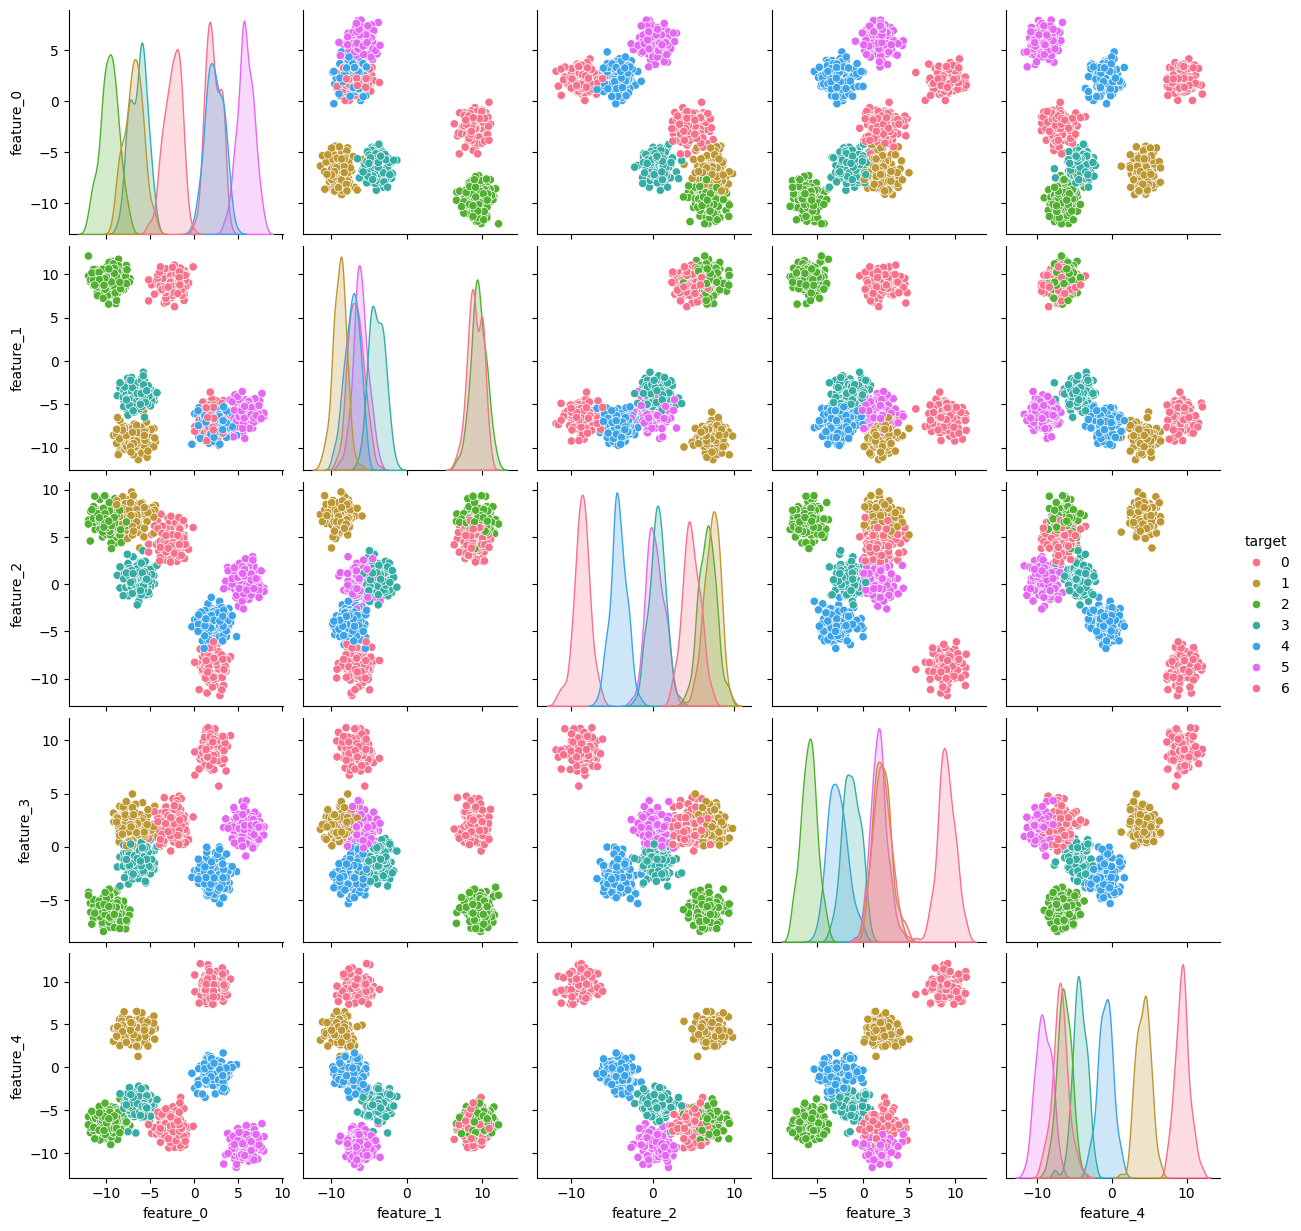

In [20]:
sns.pairplot(dados, hue="target", palette="husl")

In [21]:
from sklearn.model_selection import train_test_split

X_columns = ['feature_0', 'feature_1', 'feature_2', 'feature_3', 'feature_4']
y_columns = ['target']
X = dados[X_columns]
y = dados[y_columns]

In [22]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)
X = pd.DataFrame(X)

Árvore de decisão sem limite de profundidade

In [23]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)
preds = clf.predict_proba(X_test)
print('Accuracy: {:.5f}'.format(accuracy_score(y_test,
                                                preds.argmax(axis=1))))

Accuracy: 0.99333


Aplicando árvore de decisão com duas camadas de profundidade

In [24]:
clf = DecisionTreeClassifier(max_depth=3, random_state=42)
clf.fit(X_train, y_train)
preds = clf.predict_proba(X_test)
print('Accuracy: {:.5f}'.format(accuracy_score(y_test, preds.argmax(axis=1))))

Accuracy: 0.53667


Realizando a redução dimensional de 5 atributos para 3 atributos utilizando PCA e aplicando árvore de decisão

In [25]:
pca = decomposition.PCA(n_components=3)
pca.fit(X)
X_pca = pca.transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=.3, stratify=y, random_state=42)

clf = DecisionTreeClassifier(max_depth=3, random_state=42)
clf.fit(X_train, y_train)
preds = clf.predict_proba(X_test)
print('Accuracy: {:.5f}'.format(accuracy_score(y_test,
                                                preds.argmax(axis=1))))

Accuracy: 0.57000


Realizando a redução dimensional de 5 atributos para 3 atributos utilizando LDA e aplicando árvore de decisão

In [26]:
lda = LinearDiscriminantAnalysis(n_components=3)
lda.fit(X, y)
X_lda = lda.transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_lda, y, test_size=.3,
                                                    stratify=y,
                                                    random_state=42)

clf = DecisionTreeClassifier(max_depth=3, random_state=42)
clf.fit(X_train, y_train)
preds = clf.predict_proba(X_test)
print('Accuracy: {:.5f}'.format(accuracy_score(y_test,
                                                preds.argmax(axis=1))))

Accuracy: 0.57333


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [27]:
y.value_counts()

target
0         143
1         143
2         143
3         143
4         143
5         143
6         142
Name: count, dtype: int64

### k-means

In [29]:
X

,0,1,2,3,4
0,-1.001738,-0.388786,0.065525,-0.140892,-0.161672
1,1.478142,-0.716817,-0.054260,0.515628,-0.891786
2,1.018080,-0.685690,-0.925869,-0.656965,0.045248
3,0.955401,-0.639865,-1.792170,1.913658,1.923879
4,-0.493785,1.475001,0.779090,0.578021,-0.913413
...,...,...,...,...,...
995,0.682050,-0.609414,-1.856536,1.741013,1.967428
996,1.760708,-0.420615,-0.425666,0.265167,-1.129725
997,0.650034,-0.457923,-1.638866,1.899923,1.871101
998,0.055712,1.339526,0.762473,0.089002,-0.683149


#### Escolhendo o número apropriado de clusters, utilizando o método do cotovelo:

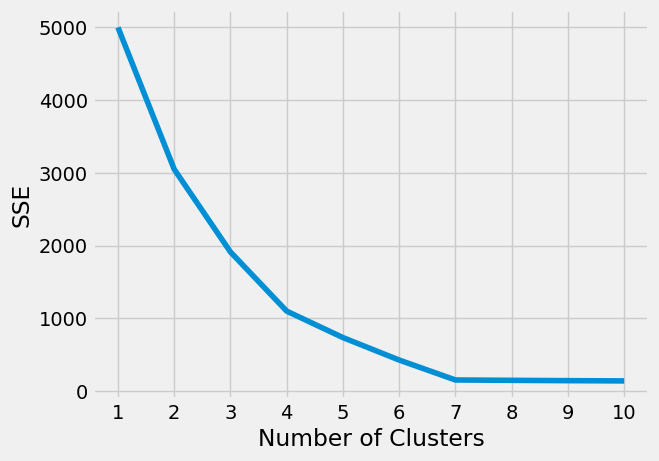

In [30]:
kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42,
}

# A list holds the SSE values for each k
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)

plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [36]:
!pip install kneed

In [41]:
from kneed import KneeLocator

kl = KneeLocator(range(1, 11), sse, curve="convex", direction="decreasing")
print(f'Melhor número de clusters: {kl.elbow}')

Melhor número de clusters: 4


Segundo este método o melhor número de clusters é igual a 4, aplicando no kmeans:

[[ 0.79526592 -0.63640654 -1.7447586   1.86770368  1.82116928]
 [-0.82362003 -0.59314458  0.53397884 -0.07146233  0.31150016]
 [ 1.15032519 -0.62870834 -0.52728568 -0.27187669 -0.47659031]
 [-0.72155747  1.53783099  0.85958558 -0.58398238 -0.73912677]]


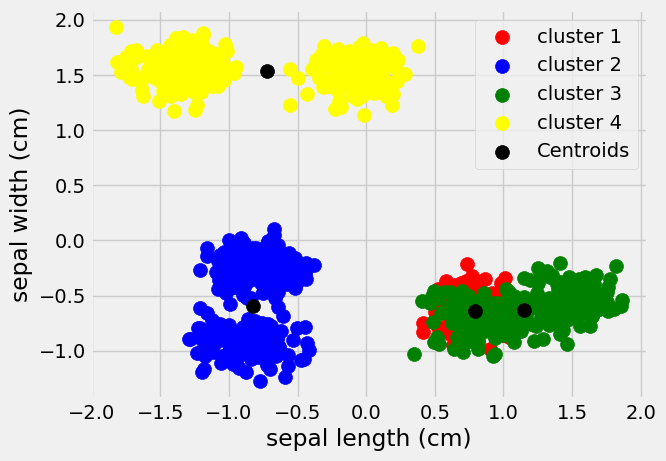

inertia: 1101.2207476267981
n_clusters: 4
n_iter: 4




In [39]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4,init = 'k-means++', max_iter = 100, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(X)
print(kmeans.cluster_centers_)

cluster_1 = X.loc[y_kmeans == 0]
cluster_2 = X.loc[y_kmeans == 1]
cluster_3 = X.loc[y_kmeans == 2]
cluster_4 = X.loc[y_kmeans == 3]
plt.scatter(cluster_1[X.columns[0]], cluster_1[X.columns[1]],s = 100, c = 'red', label = 'cluster 1')
plt.scatter(cluster_2[X.columns[0]], cluster_2[X.columns[1]],s = 100, c = 'blue', label = 'cluster 2')
plt.scatter(cluster_3[X.columns[0]],cluster_3[X.columns[1]],s = 100, c = 'green', label = 'cluster 3')
plt.scatter(cluster_4[X.columns[0]],cluster_4[X.columns[1]],s = 100, c = 'yellow', label = 'cluster 4')
plt.scatter(kmeans.cluster_centers_[:,   0], kmeans.cluster_centers_[:,1],s = 100, c = 'black', label = 'Centroids')
plt.xlabel(f"{data.feature_names[0]}")
plt.ylabel(f"{data.feature_names[1]}")
plt.legend()
plt.show()

print(f'inertia: {kmeans.inertia_}')
print(f'n_clusters: {kmeans.n_clusters}')
print(f'n_iter: {kmeans.n_iter_}\n\n')

#### Escolhendo o número apropriado de clusters, utilizando o método da silhueta:

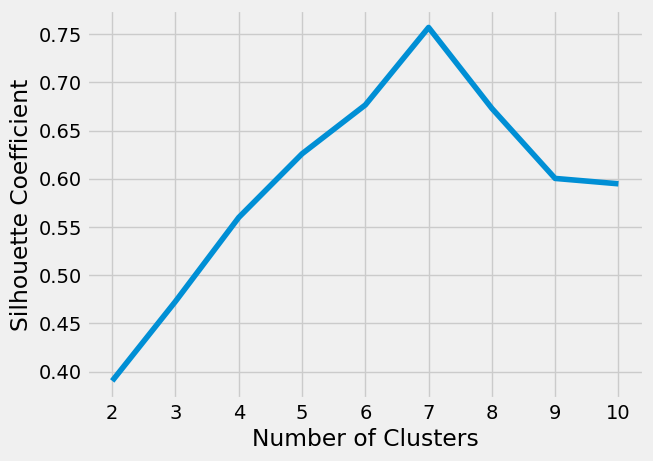

O melhor número de clusters é 7 com um coeficiente de silhueta de 0.76


In [40]:
from sklearn.metrics import silhouette_score

# A list holds the silhouette coefficients for each k
silhouette_coefficients = []

# Notice you start at 2 clusters for silhouette coefficient
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(X)
    score = silhouette_score(X, kmeans.labels_)
    silhouette_coefficients.append(score)

plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

best_k = range(2, 11)[np.argmax(silhouette_coefficients)]
print(f"Melhor número de clusters: {best_k}")

Segundo este método o melhor número de clusters é igual a 7, aplicando no kmeans:

[[ 0.79526592 -0.63640654 -1.7447586   1.86770368  1.82116928]
 [-0.7744965  -0.25866054 -0.07210513 -0.44440188 -0.36591333]
 [ 1.47434613 -0.55176291 -0.12253112  0.22920933 -1.13396306]
 [-1.3852213   1.56634269  1.03807213 -1.4762944  -0.69685355]
 [-0.87274356 -0.92762862  1.14006281  0.30147722  0.98891365]
 [-0.05789365  1.50931929  0.68109903  0.30832964 -0.78139998]
 [ 0.82630425 -0.70565377 -0.93204024 -0.77296271  0.18078244]]


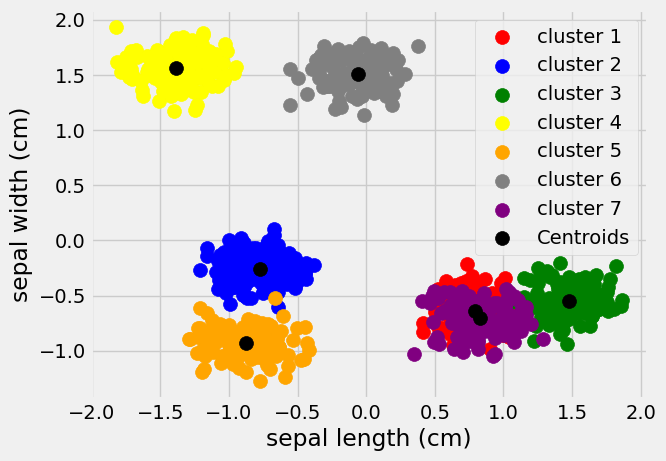

inertia: 154.93432787380243
n_clusters: 7
n_iter: 2




In [43]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=7,init = 'k-means++', max_iter = 100, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(X)
print(kmeans.cluster_centers_)

cluster_1 = X.loc[y_kmeans == 0]
cluster_2 = X.loc[y_kmeans == 1]
cluster_3 = X.loc[y_kmeans == 2]
cluster_4 = X.loc[y_kmeans == 3]
cluster_5 = X.loc[y_kmeans == 4]
cluster_6 = X.loc[y_kmeans == 5]
cluster_7 = X.loc[y_kmeans == 6]
plt.scatter(cluster_1[X.columns[0]], cluster_1[X.columns[1]],s = 100, c = 'red', label = 'cluster 1')
plt.scatter(cluster_2[X.columns[0]], cluster_2[X.columns[1]],s = 100, c = 'blue', label = 'cluster 2')
plt.scatter(cluster_3[X.columns[0]],cluster_3[X.columns[1]],s = 100, c = 'green', label = 'cluster 3')
plt.scatter(cluster_4[X.columns[0]],cluster_4[X.columns[1]],s = 100, c = 'yellow', label = 'cluster 4')
plt.scatter(cluster_5[X.columns[0]],cluster_5[X.columns[1]],s = 100, c = 'Orange', label = 'cluster 5')
plt.scatter(cluster_6[X.columns[0]],cluster_6[X.columns[1]],s = 100, c = 'gray', label = 'cluster 6')
plt.scatter(cluster_7[X.columns[0]],cluster_7[X.columns[1]],s = 100, c = 'Purple', label = 'cluster 7')
plt.scatter(kmeans.cluster_centers_[:,   0], kmeans.cluster_centers_[:,1],s = 100, c = 'black', label = 'Centroids')
plt.xlabel(f"{data.feature_names[0]}")
plt.ylabel(f"{data.feature_names[1]}")
plt.legend()
plt.show()

print(f'inertia: {kmeans.inertia_}')
print(f'n_clusters: {kmeans.n_clusters}')
print(f'n_iter: {kmeans.n_iter_}\n\n')

Com base nos resultados obtidos, podemos concluir que, ao utilizar o método do cotovelo, o número ideal de clusters é 4, mas a inércia resultante é alta, sugerindo que os clusters não são muito coesos. Por outro lado, o método da silhueta indica que 7 clusters são mais apropriados, apresentando uma inércia significativamente menor, o que implica em clusters mais compactos e bem definidos. Portanto, para uma melhor definição e separação dos clusters, o método da silhueta com 7 clusters é mais eficaz.

Nos gráficos gerados podemos perceber que utilizando 7 clusters resulta em uma melhor separação e definição dos grupos. Os clusters são mais compactos e há menos sobreposição entre eles.